In [121]:
using QuantumOptics
using Plots
using Revise
using ProgressMeter

In [122]:
level = 4

4

In [123]:
b = NLevelBasis(level)

NLevel(N=4)

In [124]:
PN = [0, 1, 2]

3-element Vector{Int64}:
 0
 1
 2

In [125]:
b_st_bosons = bosonstates(b, PN)

15-element Vector{Vector{Int64}}:
 [0, 0, 0, 0]
 [1, 0, 0, 0]
 [0, 1, 0, 0]
 [0, 0, 1, 0]
 [0, 0, 0, 1]
 [2, 0, 0, 0]
 [1, 1, 0, 0]
 [1, 0, 1, 0]
 [1, 0, 0, 1]
 [0, 2, 0, 0]
 [0, 1, 1, 0]
 [0, 1, 0, 1]
 [0, 0, 2, 0]
 [0, 0, 1, 1]
 [0, 0, 0, 2]

In [126]:
b_mb = ManyBodyBasis(b, b_st_bosons)

ManyBody(onebodybasis=NLevel(N=4), states:15)

In [ ]:
Model0 =
Model1 = 

In [127]:
H_one_body = Operator(b,zeros(level,level))
H_kin = manybodyoperator(b_mb,H_one_body)

Operator(dim=15x15)
  basis: ManyBody(onebodybasis=NLevel(N=4), states:15)
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0

In [128]:
for i in 1:level
    for j in 1:level
        H_kin += create(b_mb,i)*destroy(b_mb,j)
    end
end

In [129]:
H_kin

Operator(dim=15x15)
  basis: ManyBody(onebodybasis=NLevel(N=4), states:15)
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  …      0.0+0.0im      0.0+0.0im
 0.0+0.0im  1.0+0.0im  1.0+0.0im  1.0+0.0im         0.0+0.0im      0.0+0.0im
 0.0+0.0im  1.0+0.0im  1.0+0.0im  1.0+0.0im         0.0+0.0im      0.0+0.0im
 0.0+0.0im  1.0+0.0im  1.0+0.0im  1.0+0.0im         0.0+0.0im      0.0+0.0im
 0.0+0.0im  1.0+0.0im  1.0+0.0im  1.0+0.0im         0.0+0.0im      0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  …      0.0+0.0im      0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im         0.0+0.0im      0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im         1.0+0.0im      0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im         1.0+0.0im  1.41421+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im         0.0+0.0im      0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  …      1.0+0.0im      0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im         1.0+0.0im  1.41421+0.0im
 

In [130]:
includet("Scripts/FirstBandApproximation.jl")

In [131]:
U = 1000

1000

In [132]:
H_int = Hubbard_Interaction_Full(level, b, b_mb, U)

Operator(dim=15x15)
  basis: ManyBody(onebodybasis=NLevel(N=4), states:15)sparse([6, 10, 13, 15], [6, 10, 13, 15], ComplexF64[1000.0000000000001 + 0.0im, 1000.0000000000001 + 0.0im, 1000.0000000000001 + 0.0im, 1000.0000000000001 + 0.0im], 15, 15)

In [133]:
H_total = H_kin + H_int

Operator(dim=15x15)
  basis: ManyBody(onebodybasis=NLevel(N=4), states:15)
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  …      0.0+0.0im      0.0+0.0im
 0.0+0.0im  1.0+0.0im  1.0+0.0im  1.0+0.0im         0.0+0.0im      0.0+0.0im
 0.0+0.0im  1.0+0.0im  1.0+0.0im  1.0+0.0im         0.0+0.0im      0.0+0.0im
 0.0+0.0im  1.0+0.0im  1.0+0.0im  1.0+0.0im         0.0+0.0im      0.0+0.0im
 0.0+0.0im  1.0+0.0im  1.0+0.0im  1.0+0.0im         0.0+0.0im      0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  …      0.0+0.0im      0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im         0.0+0.0im      0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im         1.0+0.0im      0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im         1.0+0.0im  1.41421+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im         0.0+0.0im      0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im  …      1.0+0.0im      0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im         1.0+0.0im  1.41421+0.0im
 

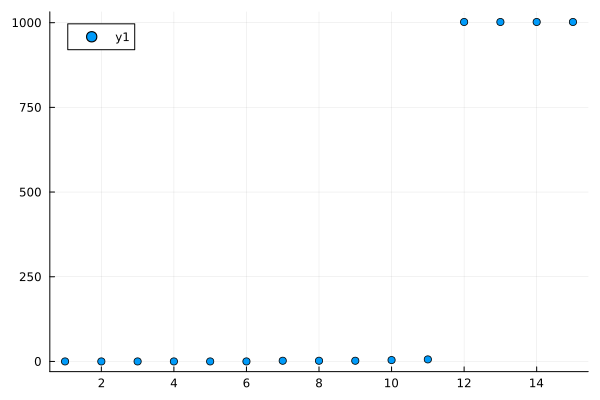

In [134]:
ϵ, λ = eigenstates(H_total)
scatter(ϵ)

In [135]:
b_st_fermions = fermionstates(b, PN)

11-element Vector{Vector{Int64}}:
 [0, 0, 0, 0]
 [1, 0, 0, 0]
 [0, 1, 0, 0]
 [0, 0, 1, 0]
 [0, 0, 0, 1]
 [1, 1, 0, 0]
 [1, 0, 1, 0]
 [1, 0, 0, 1]
 [0, 1, 1, 0]
 [0, 1, 0, 1]
 [0, 0, 1, 1]

In [136]:
b_mb_HardCore = ManyBodyBasis(b, b_st_fermions)

ManyBody(onebodybasis=NLevel(N=4), states:11)

In [137]:
H_kin_HardCore = manybodyoperator(b_mb_hard_core,H_one_body)

Operator(dim=11x11)
  basis: ManyBody(onebodybasis=NLevel(N=4), states:11)
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im

In [138]:
for i in 1:level
    for j in 1:level
        H_kin_HardCore += create(b_mb_hard_core,i)*destroy(b_mb_hard_core,j)
    end
end

In [139]:
H_int_HardCore = Hubbard_Interaction_Full(level, b, b_mb_HardCore, U)

Operator(dim=11x11)
  basis: ManyBody(onebodybasis=NLevel(N=4), states:11)sparse(Int64[], Int64[], ComplexF64[], 11, 11)

In [140]:
H_total_HardCore = H_kin_HardCore + H_int_HardCore

Operator(dim=11x11)
  basis: ManyBody(onebodybasis=NLevel(N=4), states:11)
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  1.0+0.0im  1.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  1.0+0.0im  1.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  1.0+0.0im  1.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  1.0+0.0im  1.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  1.0+0.0im  1.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     1.0+0.0im  0.0+0.0im  1.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  1.0+0.0im  1.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     2.0+0.0im  1.0+0.0im  1.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     1.0+0.0im  2.0+0.0im  1.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  1.0+0.0im  1.0+0.0im  2.0+0.0im

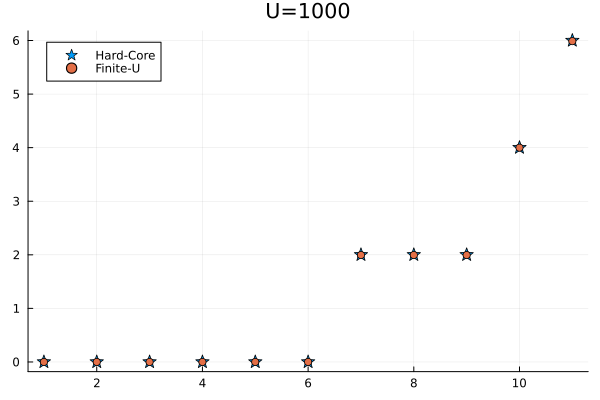

In [142]:
ϵ_HardCore, λ_HardCore = eigenstates(H_total_HardCore)
scatter(ϵ_HardCore, markershape=:star,markersize=7, label="Hard-Core")
scatter!(ϵ[1:11], title="U=$(U)", label="Finite-U")